# Step Cadence Exercise
In this exercise, you are given an wrist-worn accelerometer signal of someone who is running. Using your knowledge of signal processing, what you learned about accelerometers, and the information below, estimate the distance that the wearer ran.

- The step rate is the largest frequency component in the accelerometer signal
- The wearer's average step length is 55 inches

## Imports

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.ticker as plticker
import scipy as sp
import scipy.signal
%matplotlib inline

## Load Data

In [2]:
with np.load('exercise1.npz') as npz:
    fs = npz['fs']    # The sampling rate 
    acc = npz['acc']  # The accelerometer signal

## Estimate Distance Ran
### Visualize the signal

In [8]:
time = np.array(range(0,len(acc)))/fs

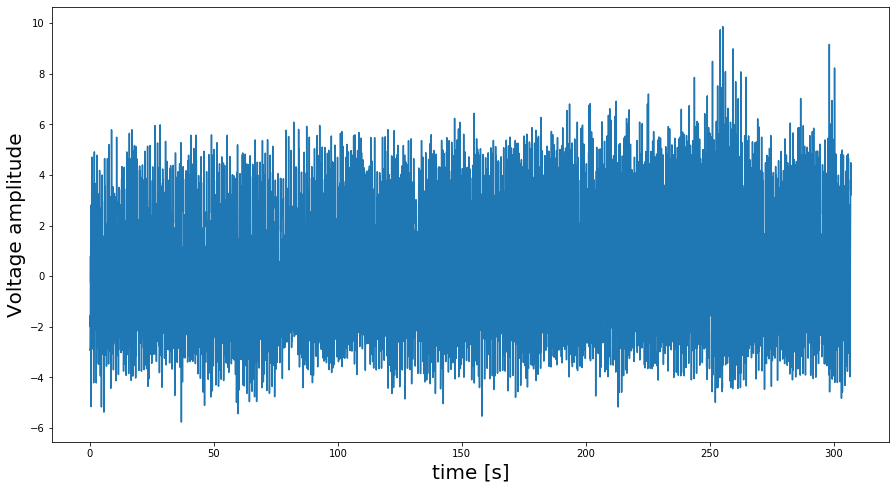

In [9]:
plt.figure(figsize=(15,8))
plt.plot(time,acc)
plt.ylabel("Voltage amplitude", fontsize=20)
plt.xlabel("time [s]", fontsize=20);

### Check frequency domain

In [5]:
# Getting frequencies vector
freqs = np.fft.rfftfreq(len(acc),1./fs)
# Gettign fourier coefficients
F_coeffs = np.fft.rfft(acc)/len(acc)

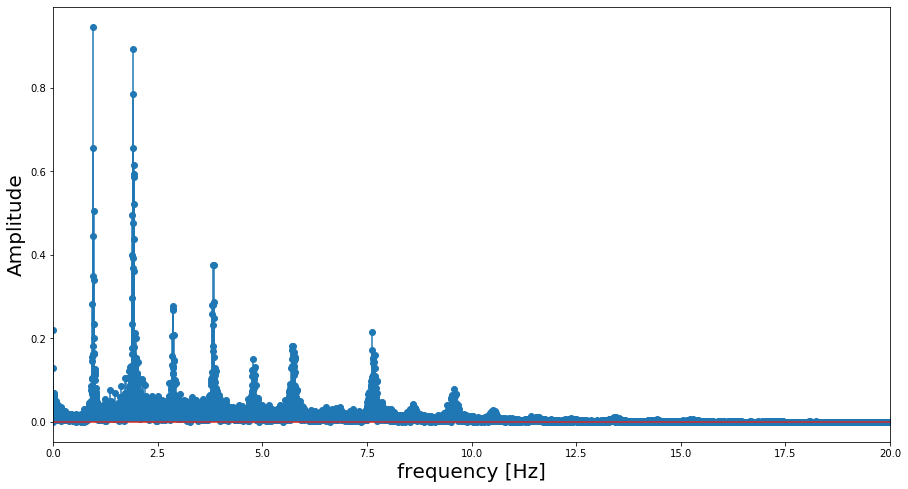

In [6]:
plt.figure(figsize=(15,8))
plt.stem(freqs,2*abs(F_coeffs), use_line_collection=True)
plt.ylabel("Amplitude", fontsize=20)
plt.xlabel("frequency [Hz]", fontsize=20);
plt.xlim(0,20);

In [54]:
def get_topK_amp_freq(Fourier_coeffs, frequencies_vector, top_k=5):
    """
        This functions gets fourier coefficients and frequencies vector and returns
        the top_k Fourier coefficient amplitudes and their respective frequencies
    """
    # Order highest amplitude frequencies from higher to lower
    ind = np.argsort(abs(Fourier_coeffs))[::-1]
    sorted_Fcoeffs = Fourier_coeffs[ind]
    maxFreqs = []
    maxFcoeffs_amp = []
    for i, freq in enumerate(frequencies_vector[ind]):
        if len(maxFreqs) >= top_k:
            break
        if np.round(freq,0) not in np.round(maxFreqs,0):
            maxFreqs.append(freq)
            maxFcoeffs_amp.append(2*abs(sorted_Fcoeffs[i]))
    return maxFreqs, maxFcoeffs_amp

In [8]:
maxFreqs, maxFcoeffs_amp = get_topK_amp_freq(F_coeffs, freqs, top_k=10)
print(f"top frequencies are: {maxFreqs}")

top frequencies are: [0.9576547231270359, 1.9120521172638438, 3.8175895765472316, 2.8631921824104234, 0.003257328990228013, 7.622149837133551, 5.726384364820847, 4.768729641693811, 9.57328990228013, 8.599348534201955]


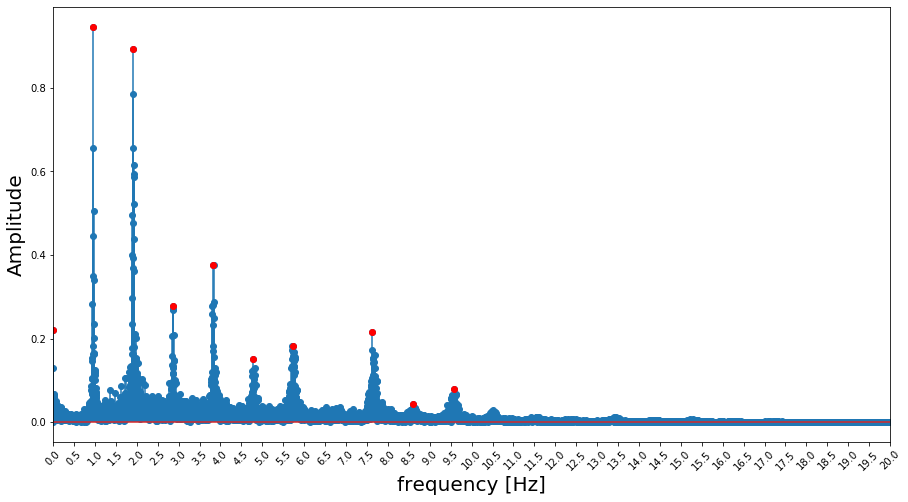

In [9]:
# Print max frequencies on the plot
plt.figure(figsize=(15,8))
ax = plt.subplot(111)
plt.stem(freqs,2*abs(F_coeffs),use_line_collection=True)
plt.plot(maxFreqs,maxFcoeffs_amp,'ro')
plt.ylabel("Amplitude", fontsize=20)
plt.xlabel("frequency [Hz]", fontsize=20);
plt.xlim(0,20);
loc = plticker.MultipleLocator(base=0.5) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xticks(rotation=45);

### Bandpass filter

In [24]:
def BandpassFilter(signal, pass_band, fs):
    """Bandpass Filter.
    
    Args:
        signal: (np.array) The input signal
        pass_band: (tuple) The pass band. Frequency components outside 
            the two elements in the tuple will be removed.
        fs: (number) The sampling rate of <signal>
        
    Returns:
        (np.array) The filtered signal
    """
    b, a = sp.signal.butter(3, pass_band, btype='bandpass', fs=fs)
    return sp.signal.filtfilt(b, a, signal)

In [25]:
# Get rid of the harmonics and any noise that could possibly present
filtered_acc = BandpassFilter(acc, (0.5,3), fs)

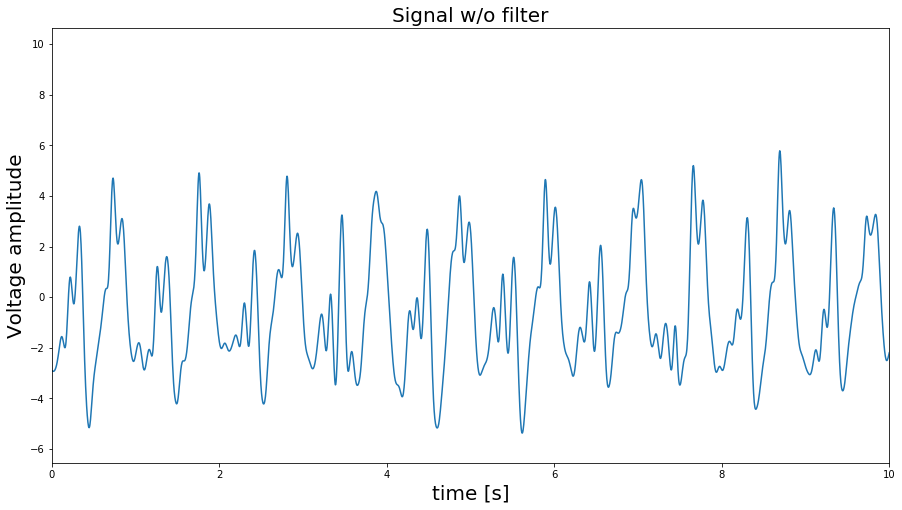

In [26]:
plt.figure(figsize=(15,8))
plt.plot(time,acc)
plt.ylabel("Voltage amplitude", fontsize=20)
plt.xlabel("time [s]", fontsize=20);
plt.xlim(0,10)
plt.title("Signal w/o filter", fontsize=20);

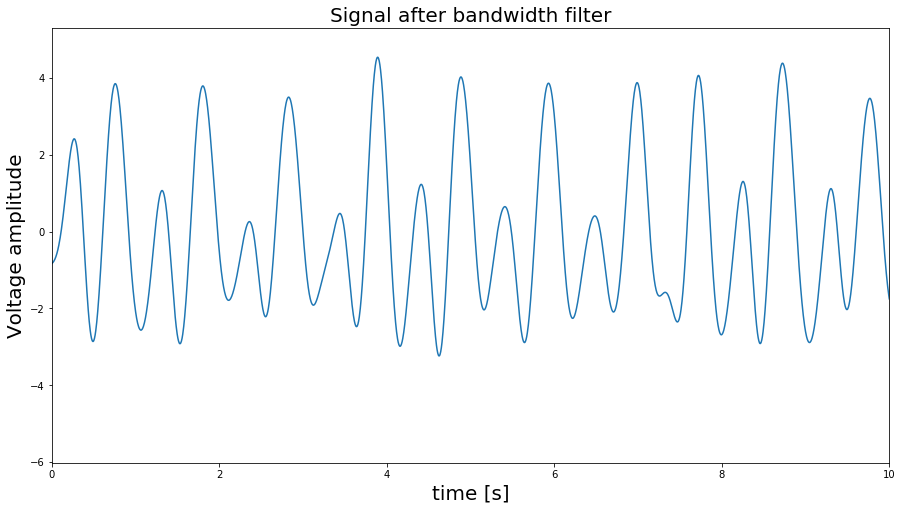

In [27]:
plt.figure(figsize=(15,8))
plt.plot(time,filtered_acc)
plt.ylabel("Voltage amplitude", fontsize=20)
plt.xlabel("time [s]", fontsize=20);
plt.xlim(0,10)
plt.title("Signal after bandwidth filter", fontsize=20);

**Conclusion** We can see from above illustrations that we got rid of the harmonics in the signal.

### Plot the spectrogram

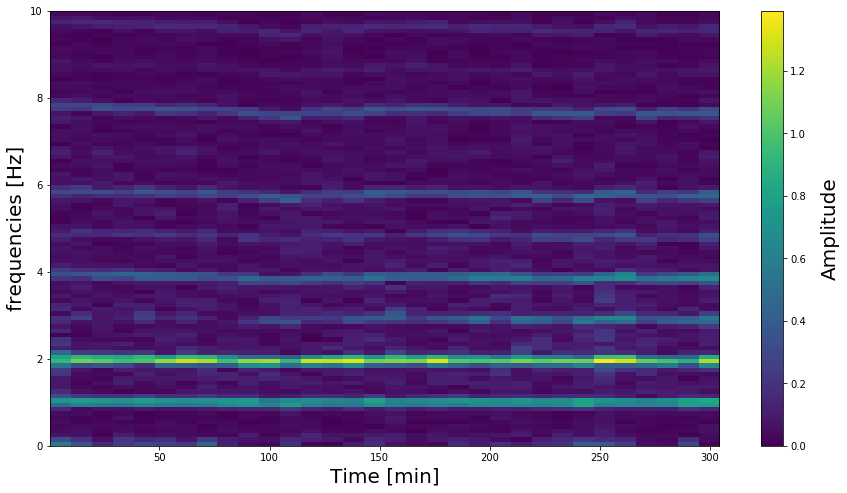

In [4]:
plt.figure(figsize=(15,8))
NFFT=fs*10
spec_amp,  freq, t, cax = plt.specgram(acc, NFFT=NFFT, scale='linear',Fs=fs, mode='magnitude');
plt.xlabel('Time [min]', fontsize=20);
plt.ylabel('frequencies [Hz]', fontsize=20);
plt.ylim(0,10)
cbar = plt.colorbar();
cbar.ax.set_ylabel('Amplitude', rotation=90, labelpad=15, fontsize=20);

In [31]:
print(f"The shape of the spec amplitudes from the spectrogram is: {spec_amp.shape}")
print("This means that each column in the spectrogram contains tha amplitude for the certain column window")

The shape of the spec amplitudes from the spectrogram is: (1281, 32)
This means that each column in the spectrogram contains tha amplitude for the certain column window


In [36]:
print(f"specgram also provides the prequencies of each column mentioned above. \
Therefore it contains a lenght of {len(freq)}")

specgram also provides the prequencies of each column mentioned above. Therefore it contains a lenght of 1281


In [38]:
# Calculating the highest frequencies for each column in the spectrogram
freq[np.argmax(spec, axis=0)]

array([1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9,
       1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9,
       1.9, 1.9, 1.9, 1.9, 1.9, 1.9])

In [41]:
# Getting the amplitude for each frequency
amp_of_freq = []
for i, ind in enumerate(np.argmax(spec, axis=0)):
    amp_of_freq.append(spec[ind][i])
np.array(amp_of_freq)

array([0.92714714, 1.08181015, 1.03846494, 0.95948018, 0.98948061,
       1.17773105, 1.27754595, 1.21640434, 0.9668563 , 1.1597621 ,
       1.18881489, 0.91569432, 1.28454714, 1.26636412, 1.33596963,
       1.09696282, 1.12989269, 1.11609766, 1.32145332, 1.0261034 ,
       0.99119278, 1.02489365, 1.10661247, 1.04109393, 1.08807014,
       1.07635983, 1.39131627, 1.29568673, 1.06254791, 0.97988769,
       0.87855814, 1.22040445])

**Conclusion** Frequency 1.9 is the predominant frequency in the spectrogram

### Why our Fourier analysis of the whole signal says that the highest frequency is around 0.95 and our spectrogram displays a 1.9 instead?

The discrepancy here is due to the lenght of the window. Since for our spectrogram we used an STFT we take smaller windows to assess the signal. Whereas for the fourier analysis in frequency domain we used the FFT. 

Below we can see that if we get the FFT of a window the same size of our spectrogam we will get similar results.

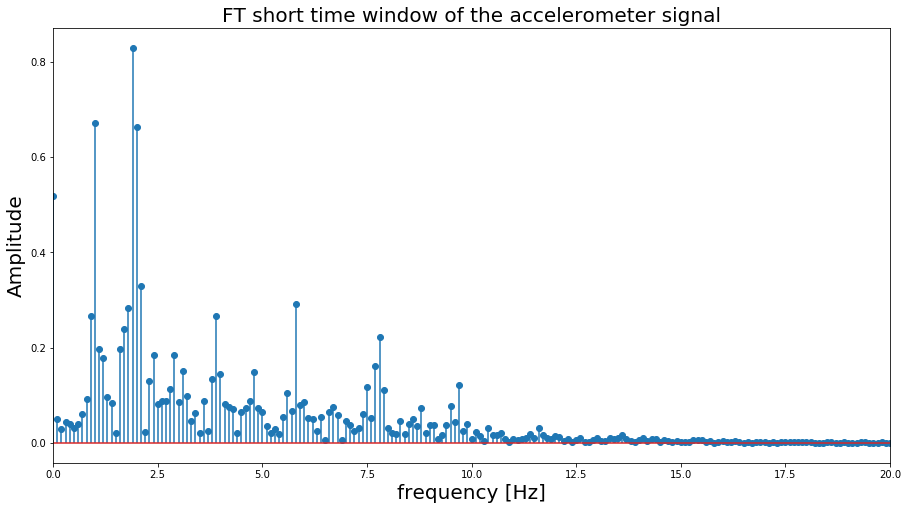

In [5]:
# Getting frequencies vector
freqs = np.fft.rfftfreq(len(acc[:NFFT]),1./fs)
# Gettign fourier coefficients
F_coeffs = np.fft.rfft(acc[:NFFT])/len(acc[:NFFT])
plt.figure(figsize=(15,8))
plt.stem(freqs,abs(F_coeffs), use_line_collection=True)
plt.ylabel("Amplitude", fontsize=20)
plt.xlabel("frequency [Hz]", fontsize=20);
plt.title('FT short time window of the accelerometer signal', fontsize=20)
plt.xlim(0,20);

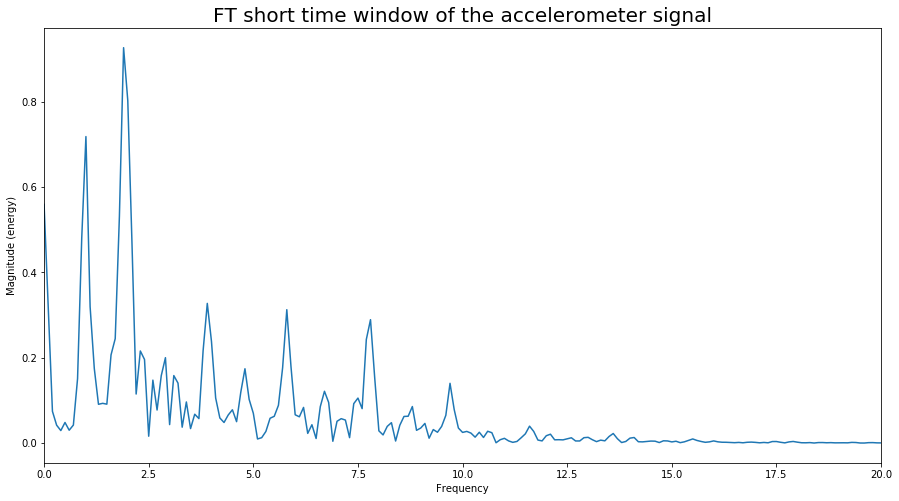

In [6]:
# The spectrogram uses plt.magnitude for each window column so we will see how the results are for the small
# window. They should be similar to the above plot
plt.figure(figsize=(15,8))
plt.magnitude_spectrum(acc[:NFFT],Fs=fs)
plt.title('FT short time window of the accelerometer signal', fontsize=20)
plt.xlim(0,20);

top frequencies are: [1.9000000000000001, 1.0, 0.0, 5.800000000000001, 3.9000000000000004]


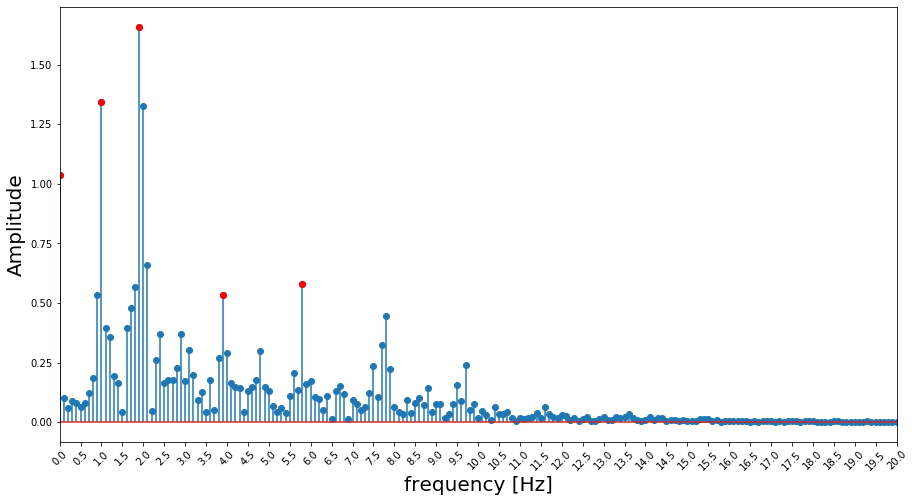

In [58]:
maxFreqs, maxFcoeffs_amp = get_topK_amp_freq(F_coeffs, freqs, top_k=5)
print(f"top frequencies are: {maxFreqs}")
# Print max frequencies on the plot
plt.figure(figsize=(15,8))
ax = plt.subplot(111)
plt.stem(freqs,2*abs(F_coeffs),use_line_collection=True)
plt.plot(maxFreqs,maxFcoeffs_amp,'ro')
plt.ylabel("Amplitude", fontsize=20)
plt.xlabel("frequency [Hz]", fontsize=20);
plt.xlim(0,20);
loc = plticker.MultipleLocator(base=0.5) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xticks(rotation=45);

### Visualize the frequency found (1.9 Hz) in the filtered accelerometer signal

In [56]:
## Getting the indexes that match the 1.9 Hz from the time vector
# We use modulus of the 1.9 hz time sample with the time to find all of the time measuements that match 
time_reminders = np.mod(time, 1/1.9)
# Clearance of the measurement. np.mod will not get perfect 0 for the ts that match 1.9 therefore we need a threshold
clrc_measurement = time_reminders[1]
# time samples indexes that match the 1.9 frequency
freq_ind = (time_reminders<clrc_measurement).nonzero()[0]

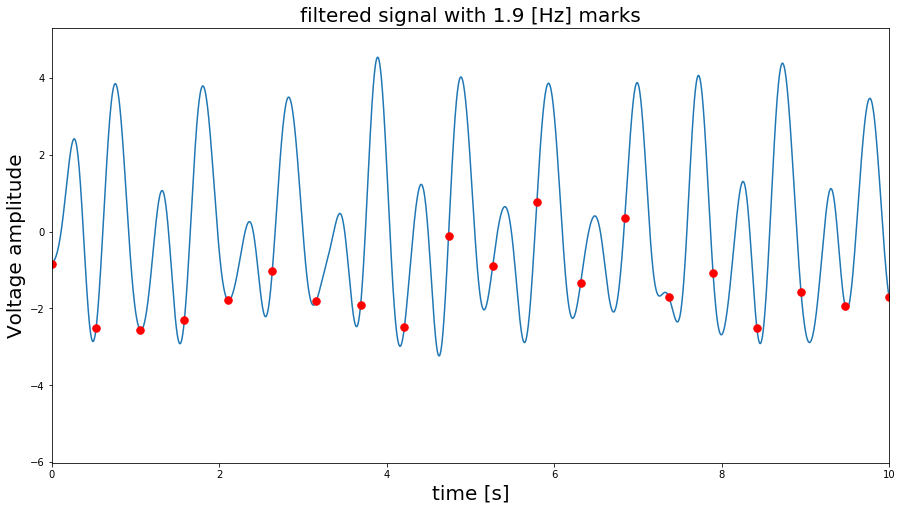

In [57]:
plt.figure(figsize=(15,8))
plt.plot(time,filtered_acc)
plt.ylabel("Voltage amplitude", fontsize=20)
plt.xlabel("time [s]", fontsize=20);
plt.xlim(0,10)
plt.plot(time[freq_ind], filtered_acc[freq_ind], 'r.', ms=15)
plt.title("filtered signal with 1.9 [Hz] marks", fontsize=20);

## Estimating the distance run by the person wearing this accelerometer

In [66]:
# We know that the average step length of a person is 55 [inches/step]
# We also know that the step rate is 1.9 [Hz] meaning that 1/1.9 [sec/step] = 1.9 [step/sec]
avg_inch_per_step = 55
step_rate = maxFreqs[0]
avg_vel__inch_per_sec = step_rate*avg_inch_per_step
inch2mile_factor = 63360
miles2kms_factor = 1.60934
distance__miles  = avg_vel__inch_per_sec*time[-1]/inch2mile_factor
distance__kms = distance__miles*miles2kms_factor
print(f"The person runned around {distance__miles} miles or {distance__kms} kms")

The person runned around 0.5063303629557292 miles or 0.8148577063191732 kms
